# Relationships

```python
# Scatter plot
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
height = brfss['HTM4']
weight = brfss['WTKG3']
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

# Transparency
plt.plot(height, weight, 'o', alpha=0.02)
plt.show()

# Marker size
plt.plot(height, weight, 'o', markersize=1, alpha=0.02)
plt.show()

# Jittering
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)
plt.show()

# More jittering
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.show()

# Zoom
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.show()
```
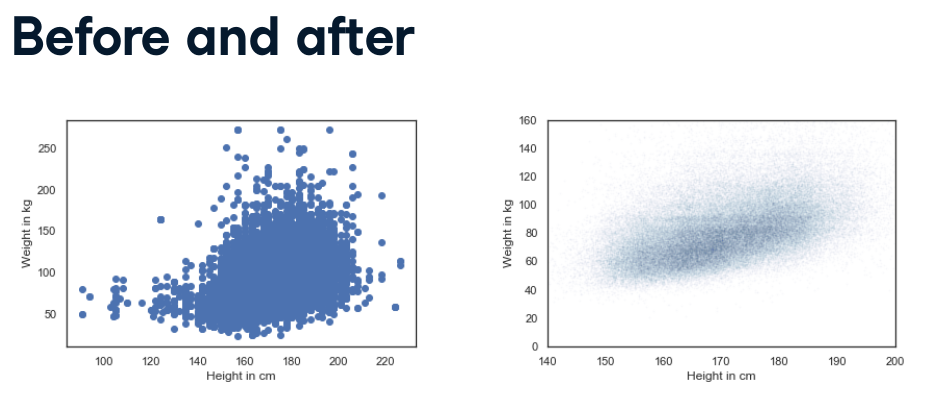

## PMF of age
> 
> Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a `.bar()` method to make a bar chart.
> 
> The BRFSS dataset includes a variable, `'AGE'` (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. `'AGE'` contains the midpoint of the bins.

In [ ]:
# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

## Scatter plot
> 
> Now let's make a scatterplot of `weight` versus `age`. To make the code run faster, I've selected only the first 1000 rows from the `brfss` DataFrame.
> 
> `weight` and `age` have already been extracted for you. Your job is to use `plt.plot()` to make a scatter plot.

### init

In [1]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(brfss)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'brfss.csv': 'https://file.io/GlPvFWKeJvq8'}}
"""
prefixToc='1.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)

#initialisation

import pandas as pd
brfss = pd.read_csv(prefix+'brfss.csv',index_col=0)

Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'brfss.csv': 'https://file.io/GlPvFWKeJvq8'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5636k    0 5636k    0     0  2753k      0 --:--:--  0:00:02 --:--:-- 2753k



In [3]:
import matplotlib.pyplot as plt

### code

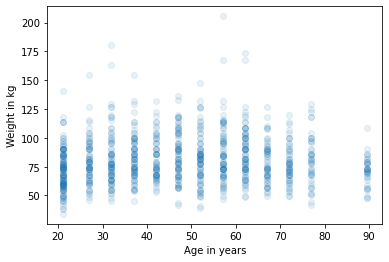

In [5]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

## Jittering
> 
> In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered `height` and `weight` in the video:
> 
>     height_jitter = height + np.random.normal(0, 2, size=len(brfss))
>     weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))

In [7]:
import numpy as np

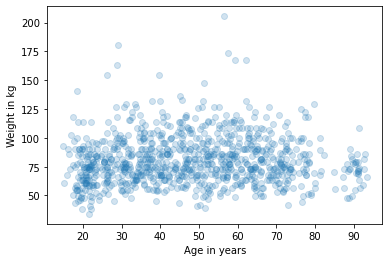

In [10]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.2)


plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

# Visualizing relationships

```python

# Violin plot
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

# Box plot
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

# Log scale
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()
```

## Height and weight
> 
> Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The `brfss` DataFrame contains a variable `'_HTMG10'` that represents height in centimeters, binned into 10 cm groups.
> 
> Recall how Allen created the box plot of `'AGE'` and `'WTKG3'` in the video, with the y-axis on a logarithmic scale:
> 
>     sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
>     plt.yscale('log')

In [12]:
import seaborn as sns

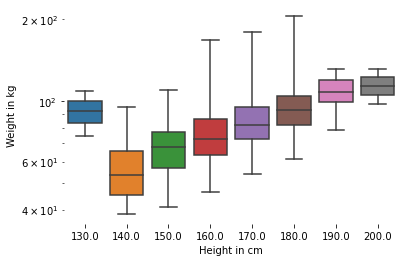

In [14]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

## Distribution of income
> 
> In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is `'INCOME2'`. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all `Pmf` objects have a `.bar()` method.

In [15]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

NameError: name 'Pmf' is not defined

## Income and height
> 
> Let's now use a violin plot to visualize the relationship between income and height.

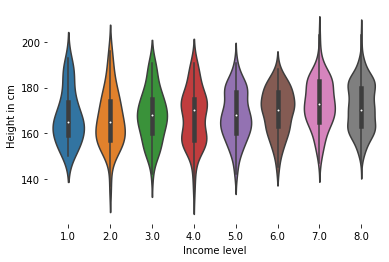

In [16]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y="HTM4", data=data)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


# Correlation

```python

# Correlation coefficient
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]
subset.corr()
```

## Computing correlations
> 
> The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable `'_VEGESU1'` represents the number of servings of vegetables respondents reported eating per day.
> 
> Let's see how this variable relates to age and income.

In [17]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


# Simple regression

```python

# Strength of effect
from scipy.stats import linregress
# Hypothetical 1
res = linregress(xs, ys)

# Regression lines
fx = np.array([xs.min(), xs.max()]) 
fy = res.intercept + res.slope * fx 
plt.plot(fx, fy, '-')

# Regression line
subset = brfss.dropna(subset=['WTKG3', 'HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

```

## Income and vegetables
> 
> As we saw in a previous exercise, the variable `'_VEGESU1'` represents the number of vegetable servings respondents reported eating per day.
> 
> Let's estimate the slope of the relationship between vegetable consumption and income.

In [18]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


## Fit a line
> 
> Continuing from the previous exercise:
> 
> -   Assume that `xs` and `ys` contain income codes and daily vegetable consumption, respectively, and
>     
> -   `res` contains the results of a simple linear regression of `ys` onto `xs`.
>     
> 
> Now, you're going to compute the line of best fit. NumPy has been imported for you as `np`.

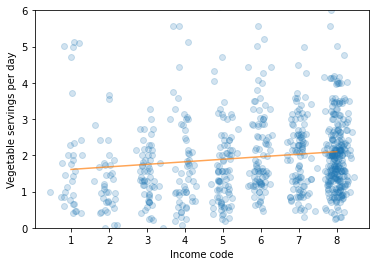

In [19]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()]) 
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()